# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0383 Емельянов Дмитрий и Черепанов Роман. Вариант №16.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения
Пусть задан сигнал $s(t), s_n = s(n), n = 0, \dots, N - 1$.

**Фильтр** $y(t)$ — преобразовние исходного сигнала по заданной формуле, $y_n = y(n)$. Пример: $$y_n = s_n + s_{n+1}, n = 0, \dots, N - 2.$$

**Рекурсивный фильтр** — фильтр, значения которого зависят от значений фильтра в предыдущие моменты времени. Пример — формула трапеций для интегрирования: $$y_{n+1} = \frac{1}{2}(s_n + s_{n+1}) + y_n, n = 0, \dots, N - 2.$$

**Нерекурсивный фильтр** — фильтр, значения которого не зависят от значений фильтра в предыдущие моменты времени. Пример — сглаживание сигнала по 5 точкам: $$y_n = \frac{1}{5}(s_{n - 2} + s_{n-1} + s_n + s_{n + 1} + s_{n+2}), n = 2, \dots, N - 3.$$

**Передаточная функция** $H(\omega)$ — оператор, показывающий связь между входным сигналом и фильтром: $y_n = s_nH(w), H(\omega) = \frac{y_n}{s_n}$. Передаточная функция имеет период $2\pi$, обычно рассматривают интервалы $[-\pi, \pi]$ для $\omega$ и (-0.5, 0.5) для $f$.


## Постановка задачи
Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

### 1) Прямая линия

---

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для сглаживания прямой линией $y(t) = A + Bt$ по $2m + 1$ точкам решается система:

$F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2=\sum_{k=-m}^{m} (s_k - A - Bk)^2 \rightarrow min$

Дифференцируем выражение по $A$ и $B$ и приравниваем результаты к 0:

\begin{cases}
    \sum_{k=-m}^{m} 2(s_k - A - Bk) = 0, \\
    \sum_{k=-m}^{m} 2k(s_k - A - Bk) = 0.
\end{cases}

Преобразуем выражение:
\begin{cases}
   \sum_{k=-m}^{m}[s_k] - (2m+1)A = 0, \\
   \sum_{k=-m}^{m}[ks_k] - B\sum_{k=-m}^{m}k^2 = 0.
\end{cases}

Отсюда:
\begin{cases}
   A = \frac{\sum_{k=-m}^{m}s_k}{2m+1}, \\
   B = \frac{\sum_{k=-m}^{m}ks_k}{\sum_{k=-m}^{m}k^2}.
\end{cases}

Пусть $s_n=e^{i\omega n}$, тогда: $$y_n=\frac{e^{-i\omega m} + \dots + e^{i\omega m}}{2m + 1} e^{i\omega n}=H(\omega)e^{i\omega n}.$$

Но $e^{-i\omega n} + e^{i\omega n} = 2\cos(\omega n)$, поэтому:

$$\frac{1 + 2\cos(\omega) + \dots + 2\cos(m\omega)}{2m + 1}e^{i\omega n}=H(\omega).$$


При этом $\tilde H(f) = H(2\pi f) = H(\omega)$.


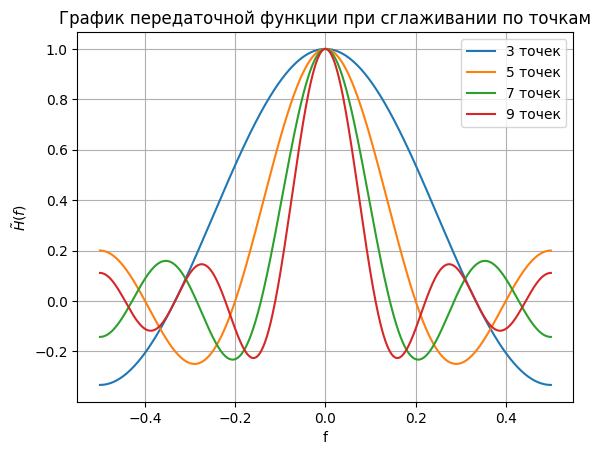

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_h(k):
  return lambda f: np.sin(k*pi*f)/(k*np.sin(f*pi))

h_3 = create_h(3)
h_5 = create_h(5)
h_7 = create_h(7)
h_9 = create_h(9)
t = np.linspace(-0.5, 0.5, 500)
h_k = [h_3, h_5, h_7, h_9]
for i, k in enumerate((3, 5, 7, 9)):
  plt.plot(t, h_k[i](t), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Чем больше точке используется при сглаживании, тем быстрее функция убывает в районе значения 0 и тем более частые колебания происходят.  

Также, исходя из графика, можно понять, что при применении передаточной функции неизменной останется амплитуда только у частоты $f=0$, при остальных частотах амплитуды уменьшаются.

### 2) Полином второй степени


---


Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для сглаживания сигнала полнимомом второго порядка $y(t)=A + Bt + Ct^2$ применяется следующее выражение:
$F(A, B, C) = \sum_{k=-m}^{m} (s_k - y_k)^2=\sum_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2 \rightarrow min$

По аналогии, дифференцируем выражение по каждой из переменных:
\begin{cases}
    \sum_{k=-m}^{m} 2(s_k - A - Bk-Ck^2) = 0, \\
    \sum_{k=-m}^{m} 2k(s_k - A - Bk-Ck^2) = 0, \\
    \sum_{k=-m}^{m} 2k^2(s_k - A - Bk-Ck^2) = 0.
\end{cases}

Преобразуем выражение:
\begin{cases}
   \sum_{k=-m}^{m}[s_k] - A(2m+1)- C\frac{m(m+1)(2m+1)}{3} = 0, \\
   \sum_{k=-m}^{m}[ks_k] - B\sum_{k=-m}^{m}k^2 = 0, \\
   \sum_{k=-m}^{m}[k^2s_k] - A\frac{m(m+1)(2m+1)}{3} - C\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15} = 0.
 \end{cases}

После решения системы получаем:
$$A = \frac{15(\frac{3m^2+3m-1}{5}\sum_{k=-m}^{m}[s_k] - \sum_{k=-m}^{m}k^2s_k)}{(2m-1)(2m+1)(2m+3)}.$$

Таким образом: $$y_n = \frac{15\cdot (\frac{3m^2+3m-1}{5}\sum_{k=n-m}^{n+m}[s_k] - \sum_{k=n-m}^{n+m}k^2s_k)}{(2m-1)(2m+1)(2m+3)}=\frac{15\cdot(\frac{3m^2+3m-1}{5}(s_{n-m}+\dots+s_{n+m})-(s_{n-1}+s_{n+1})-\dots-m^2(s_{n-m}+s_{n+m}))}{(2m-1)(2m+1)(2m+3)}.$$

По аналогии с предыдущим пунктом, рассмотрим $s_n = e^{i\omega n}$, тогда:
$$H(\omega)=\frac{15\cdot(\frac{3m^2+3m-1}{5}(1+2\cos(\omega)+ \dots + 2\cos(m\omega))-2\cos(\omega)-\dots-m^2(2cos(m\omega)))}{(2m-1)(2m+1)(2m+3)}.$$

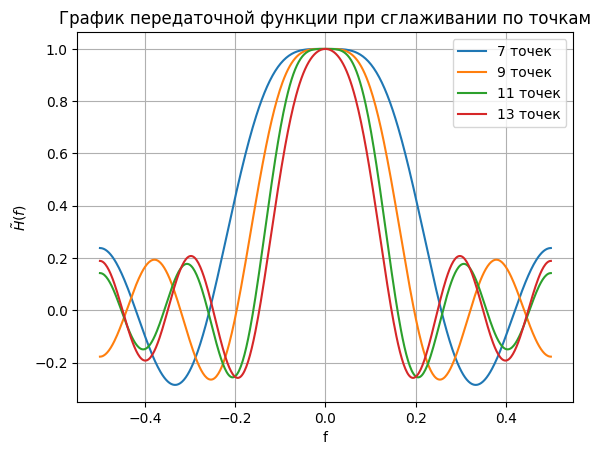

In [ ]:
def h_7(f):
  return 1/21 * (7 + 12*np.cos(2*pi*f) + 6*np.cos(4*pi*f) - 4*np.cos(6*pi*f))

def h_9(f):
  return 1/231 * (59 + 108*np.cos(2*pi*f) + 78*np.cos(4*pi*f) + 28*np.cos(6*pi*f) - 42*np.cos(8*pi*f))

def h_11(f):
  return 1/429 * (89 + 168*np.cos(2*pi*f) + 138*np.cos(4*pi*f) + 88*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 72*np.cos(10*pi*f))
def h_13(f):
  return 1/143 * (25 + 48*np.cos(2*pi*f) + 42*np.cos(4*pi*f) + 32*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 22*np.cos(10*pi*f))
t = np.linspace(-0.5, 0.5, 500)
h_k = [h_7, h_9, h_11, h_13]
for i, k in enumerate((7, 9, 11, 13)):
  plt.plot(t, h_k[i](t), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Выводы аналогичны выводам в пункте 1. Однако в данном случае можно добавить, что в районе $f=0$ большее количество точек близки к значению 1, то есть данный сигнал имеет бОльшую область передачи без шумов.  

### 3) Полином четвертой степени


---

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для приближения полиномом 4 степени исследуется выражение:

$F(A, B, C, D, E) = \sum_{k=-m}^{m} (s_k - y_k)^2=\sum_{k=-m}^{m} (s_k - A - Bk - Ck^2-Dk^3-Ek^4)^2 \rightarrow min$

Продифференцируем выражение:

\begin{cases}
    \sum_{k=-m}^{m} 2(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k^2(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k^3(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k^4(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0.  
\end{cases}

После решения системы:
$$A = \frac{3((75m^4+150m^3-175m^2-250m+60)\sum_{k=-m}^{m}[s_k]-175(2m^2+2m-3) \sum_{k=-m}^{m}[k^2s_k]+315 \sum_{k=-m}^{m}k^4s_k)}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}.$$

Передаточная функция отсюда имеет вид:
$$H(\omega)=\frac{3((75m^4+150m^3-175m^2-250m+60)(1+...+2\cos(m\omega))-175(2m^2+2m-3)(2\cos(\omega)+...+2m^2\cos(m\omega))+315(2\cos(\omega)+...+2m^4\cos(m\omega)))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}.$$

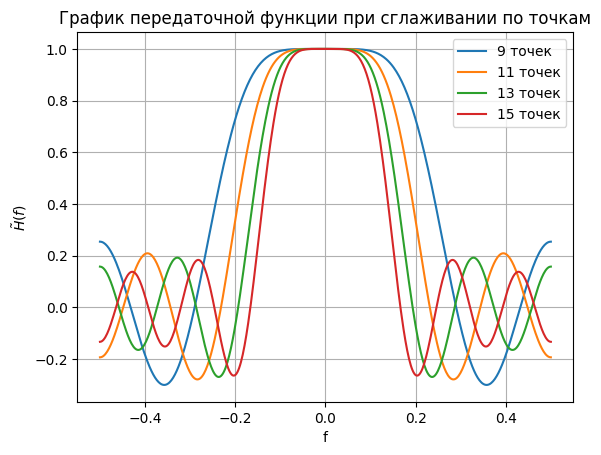

In [ ]:
def h_9(f):
  return 1/429 * (179 + 270*np.cos(2*pi*f) + 60*np.cos(4*pi*f) - 110*np.cos(6*pi*f) + 30*np.cos(8*pi*f))

def h_11(f):
  return 1/429 * (143 + 240*np.cos(2*pi*f) + 120*np.cos(4*pi*f) - 20*np.cos(6*pi*f) - 90*np.cos(8*pi*f) + 36*np.cos(10*pi*f))

def h_13(f):
  return 1/2431 * (677 + 1200*np.cos(2*pi*f) + 780*np.cos(4*pi*f) + 220*np.cos(6*pi*f) - 270*np.cos(8*pi*f) - 396*np.cos(10*pi*f) + 220*np.cos(12*pi*f))

def h_15(f):
  return 1/46189 * (11063 + 20250*np.cos(2*pi*f) + 15000*np.cos(4*pi*f) + 7510*np.cos(6*pi*f) - 330*np.cos(8*pi*f) - 5874*np.cos(10*pi*f) - 5720*np.cos(12*pi*f) + 4290*np.cos(14*pi*f))

t = np.linspace(-0.5, 0.5, 500)
h_k = [h_9, h_11, h_13, h_15]
for i, k in enumerate((9, 11, 13, 15)):
  plt.plot(t, h_k[i](t), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Выводы аналогичны 1 и 2 пунктам. Область вокруг $f=0$, где точки имеют значение, близкое к 1, стала шире, что говорит о большей области передачи без шумов.

### 4) Формулы Спенсера


---

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde H (f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


формулы Спенсера для сглаживания по 15 и 21 точкам имеют следующий вид:

$$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7}),$$

$$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} -5s_{n+8} -3s_{n+9} - s_{n+10}).$$

Заменим выражение $s_n$ на $e^{i\omega n}$ и применим формулу $e^{-i\omega n} + e^{i\omega n} = 2\cos(\omega n)$.

Для сглаживания по 15 точкам:
$$H(\omega) = \frac{1}{320}(-6\cos(7\omega) - 12\cos(6\omega) - 10\cos(5\omega) + 6\cos(4\omega) + 42\cos(3\omega) + 92\cos(2\omega) + 134\cos(\omega)+ 74).$$

Для сглаживания по 21 точке:

$$$H(\omega) = \frac{1}{350}(-2\cos(10\omega) - 6\cos(9\omega) - 10\cos(8\omega) - 10\cos(7\omega) - 4\cos(6\omega) + 12\cos(5\omega) + 36\cos(4\omega) + 66\cos(3\omega) + 94\cos(2\omega) + 114\cos(\omega) + 60)$$

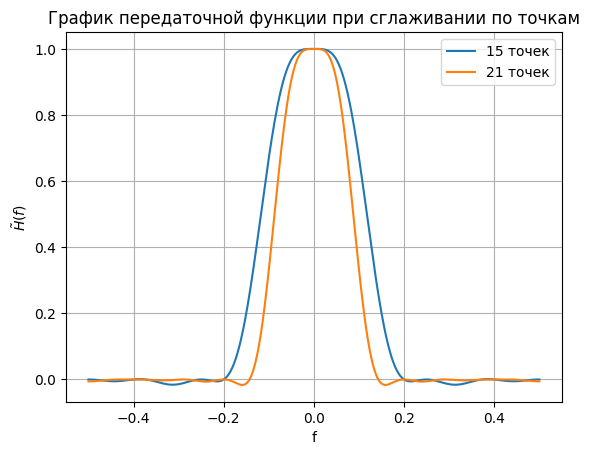

In [ ]:
def h_15(f):
  return 1/320 * (74 + 134*np.cos(2*pi*f) + 92*np.cos(4*pi*f) + 42*np.cos(6*pi*f) + 6*np.cos(8*pi*f) - 10*np.cos(10*pi*f) - 12*np.cos(12*pi*f) - 6*np.cos(14*pi*f))

def h_21(f):
  return 1/350 * (60 + 114*np.cos(2*pi*f) + 94*np.cos(4*pi*f) + 66*np.cos(6*pi*f) + 36*np.cos(8*pi*f) + 12*np.cos(10*pi*f) - 4*np.cos(12*pi*f) - 10*np.cos(14*pi*f) - 10*np.cos(16*pi*f) - 6*np.cos(18*pi*f) - 2*np.cos(20*pi*f))

t = np.linspace(-0.5, 0.5, 500)
h_k = [h_15, h_21]
for i, k in enumerate((15, 21)):
  plt.plot(t, h_k[i](t), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Исходя из графика, можно сделать вывод, что обе кривые имеют быстрое убывание в районе $f=0$ и очень малую амплитуду колебаний. С увеличением количества точек убывание становится более быстрым.

### 5) Графики в логарифмической шкале


---


Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Для перевода в логарифмическую шкалу (Дб) нужно преобразовать значение в $20\log_{10}\Big(\frac{|y_n|}{|s_n|} \Big)$.

In [ ]:
def to_log(x):
  return 20*np.log10(abs(x))

#### 5.1

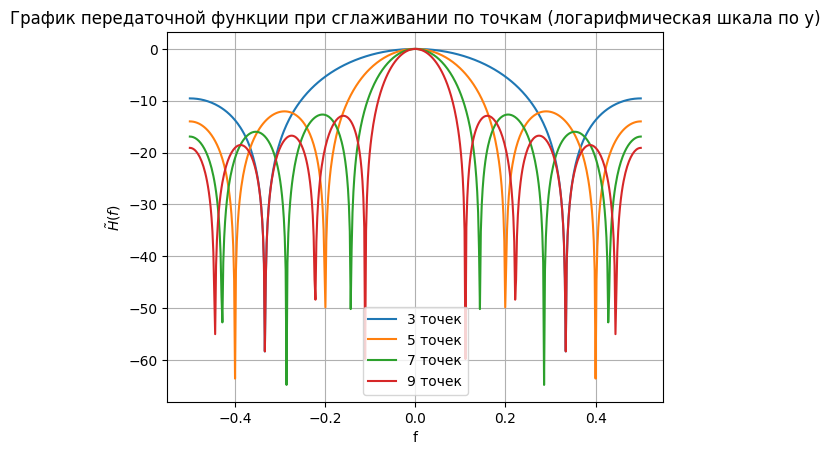

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_h(k):
  return lambda f: np.sin(k*pi*f)/(k*np.sin(f*pi))

h_3 = create_h(3)
h_5 = create_h(5)
h_7 = create_h(7)
h_9 = create_h(9)
t = np.linspace(-0.5, 0.5, 500)
h_k = [h_3, h_5, h_7, h_9]
for i, k in enumerate((3, 5, 7, 9)):
  plt.plot(t, to_log(h_k[i](t)), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам (логарифмическая шкала по y)")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

#### 5.2

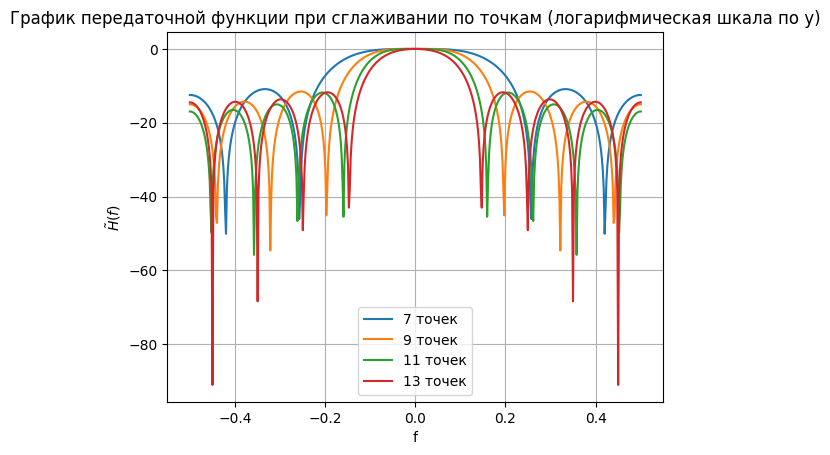

In [ ]:
def h_7(f):
  return 1/21 * (7 + 12*np.cos(2*pi*f) + 6*np.cos(4*pi*f) - 4*np.cos(6*pi*f))

def h_9(f):
  return 1/231 * (59 + 108*np.cos(2*pi*f) + 78*np.cos(4*pi*f) + 28*np.cos(6*pi*f) - 42*np.cos(8*pi*f))

def h_11(f):
  return 1/429 * (89 + 168*np.cos(2*pi*f) + 138*np.cos(4*pi*f) + 88*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 72*np.cos(10*pi*f))
def h_13(f):
  return 1/143 * (25 + 48*np.cos(2*pi*f) + 42*np.cos(4*pi*f) + 32*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 22*np.cos(10*pi*f))
t = np.linspace(-0.5, 0.5, 500)
h_k = [h_7, h_9, h_11, h_13]
for i, k in enumerate((7, 9, 11, 13)):
  plt.plot(t, to_log(h_k[i](t)), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам (логарифмическая шкала по y)")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

#### 5.3

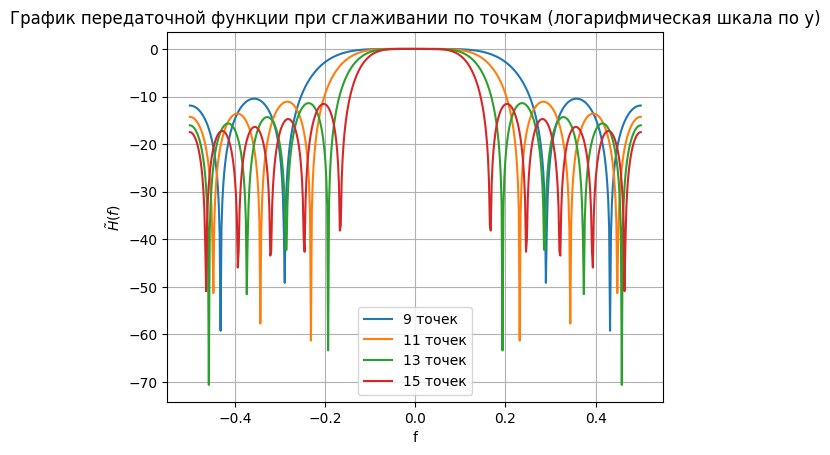

In [ ]:
def h_9(f):
  return 1/429 * (179 + 270*np.cos(2*pi*f) + 60*np.cos(4*pi*f) - 110*np.cos(6*pi*f) + 30*np.cos(8*pi*f))

def h_11(f):
  return 1/429 * (143 + 240*np.cos(2*pi*f) + 120*np.cos(4*pi*f) - 20*np.cos(6*pi*f) - 90*np.cos(8*pi*f) + 36*np.cos(10*pi*f))

def h_13(f):
  return 1/2431 * (677 + 1200*np.cos(2*pi*f) + 780*np.cos(4*pi*f) + 220*np.cos(6*pi*f) - 270*np.cos(8*pi*f) - 396*np.cos(10*pi*f) + 220*np.cos(12*pi*f))

def h_15(f):
  return 1/46189 * (11063 + 20250*np.cos(2*pi*f) + 15000*np.cos(4*pi*f) + 7510*np.cos(6*pi*f) - 330*np.cos(8*pi*f) - 5874*np.cos(10*pi*f) - 5720*np.cos(12*pi*f) + 4290*np.cos(14*pi*f))

t = np.linspace(-0.5, 0.5, 500)
h_k = [h_9, h_11, h_13, h_15]
for i, k in enumerate((9, 11, 13, 15)):
  plt.plot(t, to_log(h_k[i](t)), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам (логарифмическая шкала по y)")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

#### 5.4

<ipython-input-15-4da14d9aa5a0>:2: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(abs(x))


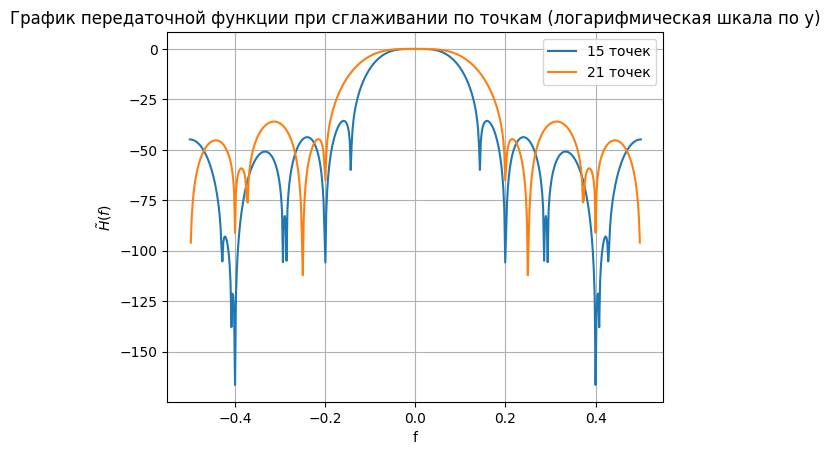

In [ ]:
def h_15(f):
  return 1/320 * (74 + 134*np.cos(2*pi*f) + 92*np.cos(4*pi*f) + 42*np.cos(6*pi*f) + 6*np.cos(8*pi*f) - 10*np.cos(10*pi*f) - 12*np.cos(12*pi*f) - 6*np.cos(14*pi*f))

def h_21(f):
  return 1/350 * (60 + 114*np.cos(2*pi*f) + 94*np.cos(4*pi*f) + 66*np.cos(6*pi*f) + 36*np.cos(8*pi*f) + 12*np.cos(10*pi*f) - 4*np.cos(12*pi*f) - 10*np.cos(14*pi*f) - 10*np.cos(16*pi*f) - 6*np.cos(18*pi*f) - 2*np.cos(20*pi*f))

t = np.linspace(-0.5, 0.5, 500)
h_k = [h_21, h_15]
for i, k in enumerate((15, 21)):
  plt.plot(t, to_log(h_k[i](t)), label=f"{k} точек")
plt.title("График передаточной функции при сглаживании по точкам (логарифмическая шкала по y)")
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Графики в логарифмической шкале более информативны, так как на них более заметны частотные характеристики, которые может быть трудно заметить у сигналов с низкой амплитудой.
Исследуя графики в логарифмической шкале, можно сделать вывод, что сглаживание позволяет поглотить высокочастотный шум, и оставить без изменений низкочастотный сигнал.

### 6) Сопоставительный анализ

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

При исследовании полученных передаточных функций можно сделать следующие выводы:
1. С ростом количества точек убывание графика в районе $f=0$ происходит быстрее, частота колебаний увеличивается, а амплитуда уменьшается.
2. Сигнал при частоте $f=0$ не изменяется.
3. При увеличении порядка полинома увеличивается область вокруг $f=0$ со значениями, близкими к 1, то есть увеличивается область пропускания сигнала.
4. Формулы Спенсера наиболее эффективно подавляют высокочастотные шумы.

## Выводы

В результате выполнения практической работы были рассмотрены передаточные функции нерекурсивных фильтров, проведён анализ их частотных свойств. Были рассмотрены методы сглаживания по полиномам первой, второй, четвертой степеням. Были применены Формулы Спенсера для сглаживания полинома по 15 и 21 точкам. Были построены графики данных функций в обычной и логарифмической (Дб) шкалах.

Рассмотренные фильтры можно использовать для подавления высокочастотных шумов, однако характеристики этих фильтров отличаются: так, фильтры, построеные с помощью формул Спенсера, более эффективны для подавления высокочастотных шумов; при изменении степени полинома и количества точек, по которым происходит сглаживание, изменяются область пропускания сигнала и частота колебаний передаточной функции.